# Project: Iris Flower Classification using K-Means
In this project, 

The K-Means algorithm:

1. Place k random centroids for the initial clusters.
2. Assign data samples to the nearest centroid.
3. Update centroids based on the above-assigned data samples.
4. Repeat Steps 2 and 3 until convergence.

## Part 1: Load and Inspect the data

In [18]:
import numpy as np

In [12]:
# load the dataset
# The Iris dataset consists of measurements of sepals and petals of 3 different plant species:
# Iris setosa, Iris versicolor, Iris virginica
from sklearn import datasets
iris = datasets.load_iris()

In [14]:
print(iris.data)
# The iris.target values give the ground truth for the Iris dataset. Ground truth, in this case, is the number corresponding to the flower that we are trying to learn
print(iris.target)
# Descriptions of the data
print(iris.DESCR)
# Column 0: Sepal length
# Column 1: Sepal width
# Column 2: Petal length
# Column 3: Petal width

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

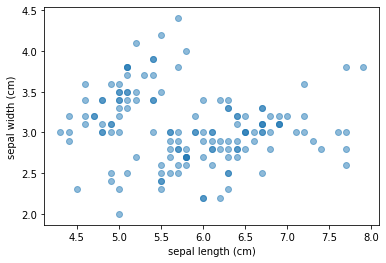

In [27]:
import matplotlib.pyplot as plt

samples = iris.data
# Column 0: Sepal length
x = samples[:,0]
# Column 1: Sepal width
y = samples[:,1]
# In order to better see the overlapping results, we'll also use the alpha keyword to adjust the transparency level
plt.scatter(x, y, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

## Part 2: Place random centroids 

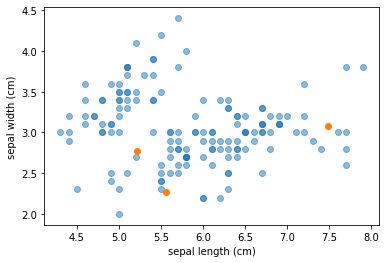

In [29]:
# Because we expect there to be three clusters (for the three species of flowers), 
# let’s implement K-Means where the k is 3.
k = 3
# Create x coordinates of k random centroids
centroids_x = np.random.uniform(min(x), max(x), size = k)

# Create y coordinates of k random centroids
centroids_y = np.random.uniform(min(y), max(y), size = k)

# Create centroids array
centroids = np.array(list(zip(centroids_x, centroids_y)))

# Make a scatter plot of x, y
plt.scatter(x, y, alpha=0.5)

# Make a scatter plot of the centroids
plt.scatter(centroids_x, centroids_y)

# Display plot
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

## Part 3: Assign data samples to the nearest centroid.

## Part 4: Create Random Forest Model